In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

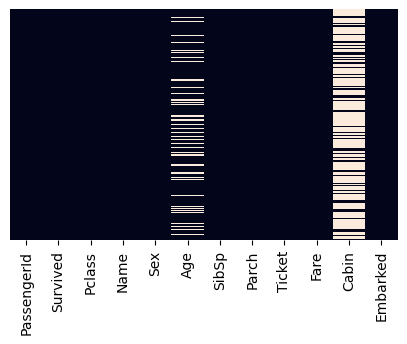

In [21]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

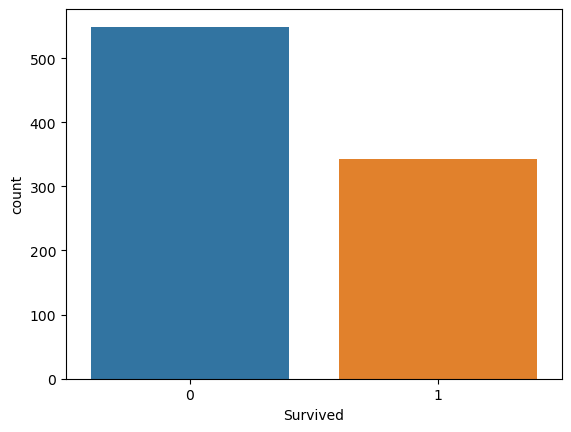

In [22]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

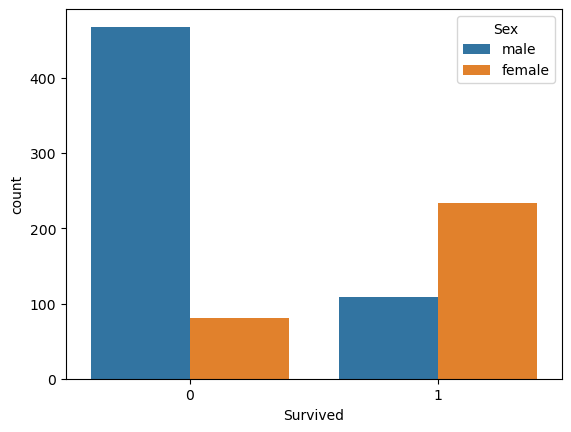

In [23]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [29]:
df['Survived'] = df['Survived'].astype(str)
df['Pclass'] = df['Pclass'].astype(str)

<Axes: xlabel='Survived', ylabel='count'>

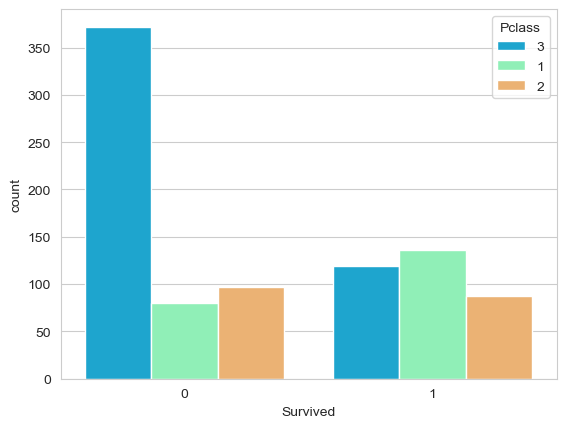

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

C:\Users\RAMANA\AppData\Local\Temp\ipykernel_9736\1507792019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,bins=40)


<Axes: xlabel='Age'>

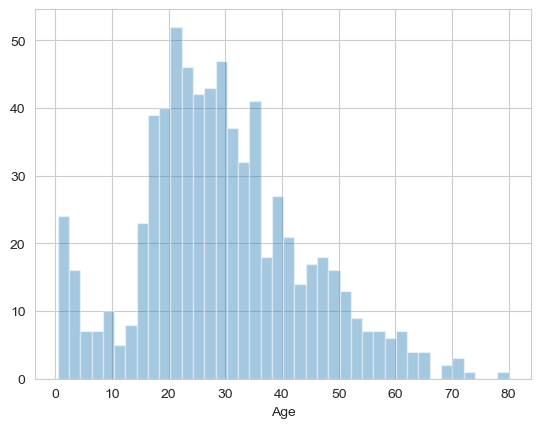

In [35]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40)

<Axes: >

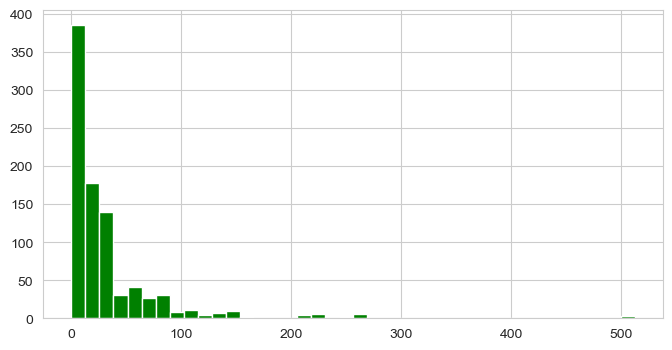

In [40]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

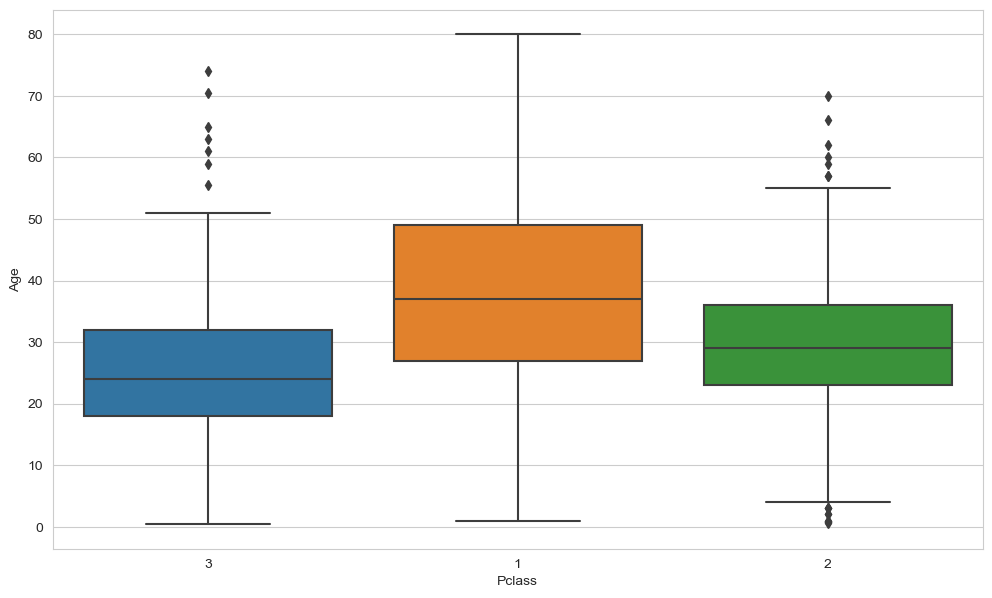

In [41]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [45]:
def simple(col):
    pcl=col[0]
    ag=col[1]
    if pd.isnull(ag):
        if pcl == 1:
            return 37
        if pcl == 2:
            return 29
        if pcl == 3:
            return 24
    else:
        return ag

In [46]:
df['Age']=df[['Age','Pclass']].apply(simple,axis=1)

C:\Users\RAMANA\AppData\Local\Temp\ipykernel_9736\3571672028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pcl=col[0]
C:\Users\RAMANA\AppData\Local\Temp\ipykernel_9736\3571672028.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ag=col[1]


<Axes: >

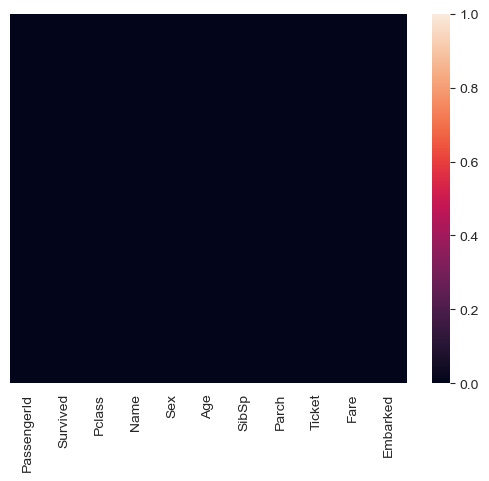

In [54]:
sns.heatmap(df.isnull(),yticklabels=False)

In [51]:
df=df.drop('Cabin',axis=1)

<Axes: >

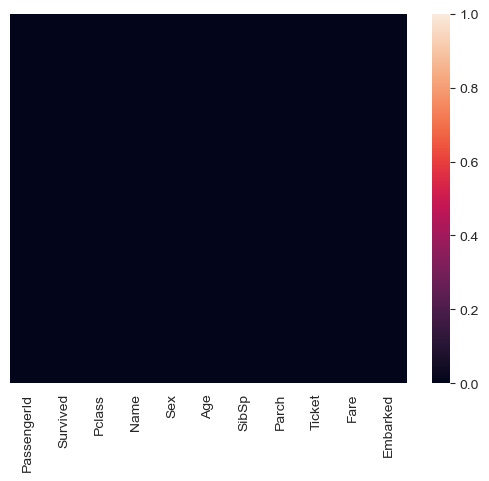

In [53]:
sns.heatmap(df.isnull(),yticklabels=False)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,S


In [58]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [60]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [61]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,3,1,0,7.2500
1,2,1,1,1,1,0,71.2833
2,3,1,3,3,0,0,7.9250
3,4,1,1,1,1,0,53.1000
4,5,0,3,3,0,0,8.0500


In [64]:
df=pd.concat([df,sex,embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,3,1,0,7.2500,True,False,True
1,2,1,1,1,1,0,71.2833,False,False,False
2,3,1,3,3,0,0,7.9250,False,False,True
3,4,1,1,1,1,0,53.1000,False,False,True
4,5,0,3,3,0,0,8.0500,True,False,True


In [67]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [74]:
 X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.03, random_state=101)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\RAMANA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
model.score( X_test, y_test)

0.7777777777777778